# Problem 1
ロジスティック回帰 + L2正則化

学習データを$x_i\in \mathbb{R}^2,\ y_i\in \{-1,1\}$とする。
$$J\colon \mathbb{R}^2\to \mathbb{R}$$
$$J(w) = \frac{1}{n}\sum_{i=1}^n (\ln (1 + \exp(-y_iw^\top x_i)))  +\lambda w^\top w$$
としたとき、
$$\hat w = \arg\min_w J(w)$$
を求める。解析解は求められないので、最急降下法とニュートン法で上記の最適解を求める。

時刻$t\in\mathbb{N}$における(最急降下法またはニュートン法の)更新を
$$w^{(t+1)} = w^{(t)} + \alpha^{(t)}d^{(t)}$$
とする。今回は簡単のため、$\alpha^{(t)}$は$t$によらない定数とする。(課題資料より)

## 最急降下法の式
$$d^{(t)} = -\nabla J(w^{(t)})$$
で求められる。なお、

$$\nabla J(w)  =  \frac{1}{n}\sum_{i=1}^n \frac{-yx_i\exp(-yw^\top x_i)}{1 + \exp(-yw^\top x_i)} + 2\lambda w$$

である。



## ニュートン法の式
$$d^{(t)} = -(\nabla^2 J(w^{(t)}))^{-1} \nabla J(w^{(t)})$$

## データセットの作成
教師データ$(x_i, y_i)_{i=1}^n$
$x_i\in \mathbb{R}^2,\ y_i\in \{-1,1\}$



In [279]:
import numpy as np
import matplotlib.pyplot as plt

In [280]:
from collections import namedtuple
Entry = namedtuple('Entry', ('x', 'y'))

In [281]:
from numpy.random import *

seed(1000) # 再現性のためにシード固定
n= 40
omega = randn(1,1) # 境界線の傾きのようなもの
noise = 0.8 * randn(n,1)

x = randn(n,2)
y = 2 * (omega * x[: , 0:1] + x[: , 1:2]   + noise > 0) - 1
# x[:, 0]だと1次元のベクトルが出てきて、行列演算が適用できない。
# x[:,0:1]とすることで0列目をn行1列の行列として抽出できる。

data = [Entry(elem[0], elem[1]) for elem in zip(list(x), list(y))]

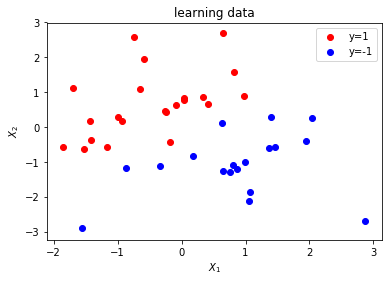

In [363]:
# プロットする

# y=-1とy=1でデータセットを分離する

# y=1のデータ
data_p1 = [elem.x for elem in data if elem.y == 1]
# y=-1のデータ
data_m1 = [elem.x for elem in data if elem.y == -1]

# xの第1成分と第2成分を分離
data_p1x1 = [x[0] for x in data_p1]
data_p1x2 = [x[1] for x in data_p1]
data_m1x1 = [x[0] for x in data_m1]
data_m1x2 = [x[1] for x in data_m1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(data_p1x1,data_p1x2, c='red', label='y=1')
ax.scatter(data_m1x1, data_m1x2, c='blue', label='y=-1')

ax.set_title('learning data')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.legend(loc='upper right')

In [371]:
# 正則化項
lam = 1

In [372]:
# Jの定義
# wはベクトル
def J(w):
    def f(entry):
        x = entry.x
        y = entry.y
        return np.log(1 + np.exp(-y * np.dot(w, x)))
    return (1/n) * sum([f(entry) for entry in data]) + lam * np.dot(w,w)


## 最急降下法の実装

In [373]:
# ∇Jの定義
def nablaJ(w):
    def f(entry):
        x = entry.x
        y = entry.y
        exp_mywx = np.exp(-y * np.dot(w,x))
        return (-y*x * exp_mywx)/(1 + exp_mywx)
    return (1/n) * sum([f(entry) for entry in data] + 2 * lam * w)
    

In [378]:
# 更新ベクトルの計算 (w(t+1)= w(t) + alpha(t) d(t) のd(t))
def delta(w):
     return - nablaJ(w)

alpha = 0.1 # tによらない定数とする。

In [390]:
numIterations = 100
wlist = []
w0 = np.array([0,0])# wの初期値
wlist.append(w0)

for i in range(1, numIterations):
    wold = wlist[i-1]
    wnew = wold + alpha * delta(wold)
    wlist.append(wnew)

print("w, j")

jlist = [J(w) for w in wlist]
for w, j in zip(wlist, jlist):
    print(w,j)
    

w, j
[0 0] [0.69314718]
[-0.03226266  0.04271519] [0.66798068]
[-0.05674535  0.0749763 ] [0.65357338]
[-0.07533217  0.09935001] [0.6453186]
[-0.08945098  0.11777337] [0.64058403]
[-0.10018186  0.13170561] [0.63786574]
[-0.1083419   0.14224592] [0.63630369]
[-0.11454965  0.15022283] [0.63540539]
[-0.11927387  0.1562614 ] [0.63488849]
[-0.12287016  0.16083358] [0.63459091]
[-0.12560846  0.16429601] [0.63441952]
[-0.12769389  0.16691834] [0.63432079]
[-0.12928237  0.16890456] [0.6342639]
[-0.13049248  0.17040906] [0.63423111]
[-0.13141447  0.1715487 ] [0.6342122]
[-0.13211701  0.17241198] [0.63420131]
[-0.13265238  0.17306592] [0.63419502]
[-0.13306039  0.17356127] [0.6341914]
[-0.13337137  0.1739365 ] [0.63418931]
[-0.13360841  0.17422072] [0.63418811]
[-0.1337891  0.174436 ] [0.63418741]
[-0.13392684  0.17459906] [0.63418701]
[-0.13403186  0.17472256] [0.63418678]
[-0.13411193  0.1748161 ] [0.63418665]
[-0.13417298  0.17488694] [0.63418657]
[-0.13421954  0.17494059] [0.63418652]
[-0.134

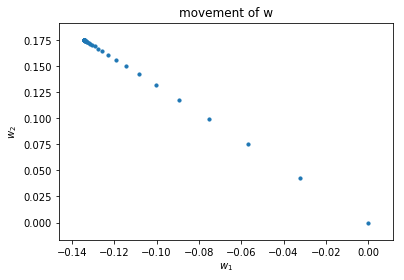

In [403]:
# wの収束の様子

w1list = [w[0] for w in wlist]
w2list = [w[1] for w in wlist]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(w1list, w2list, s=10)

ax.set_title('movement of w')
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$');


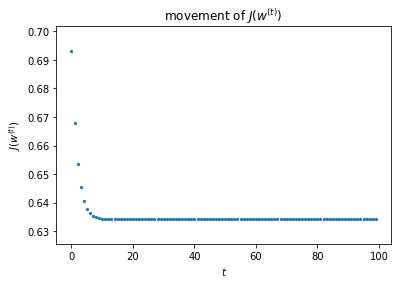

In [405]:
# J(w)の収束の様子
iteration = range(0,numIterations)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(iteration, jlist, s=5)

ax.set_title('movement of $J(w^{(t)})$')
ax.set_xlabel('$t$')
ax.set_ylabel('$J(w^{(t)})$');

## 問題点
* 正則化項の$\lambda$をどうするか
* 最急降下法とニュートン法の更新レート$\alpha$をどうするか

収束するように適当に選んだ。$\alpha$ha


## メモ
* Python3.6.5

In [381]:
omega

array([[-0.8044583]])